# Flink 기본 개념
## Batch Processing - Spark
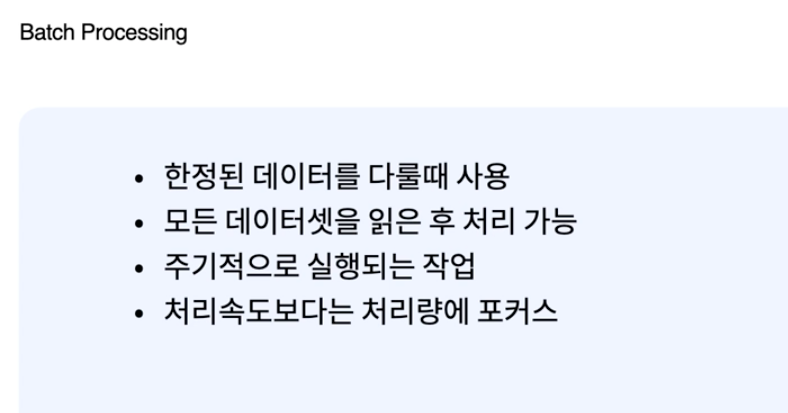 

## Stream Processing - Flink
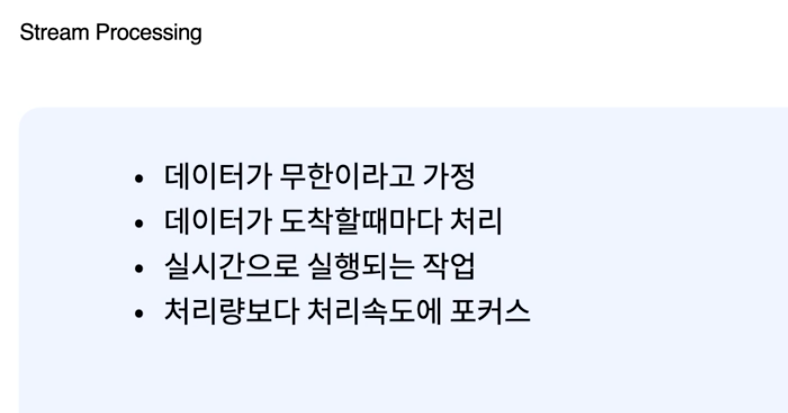
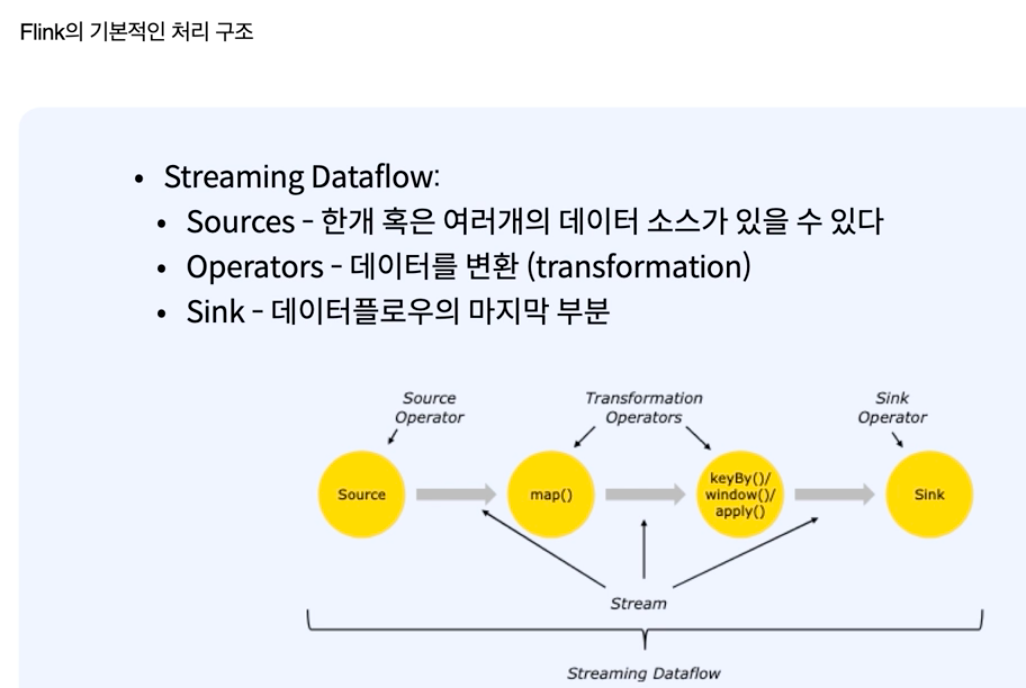
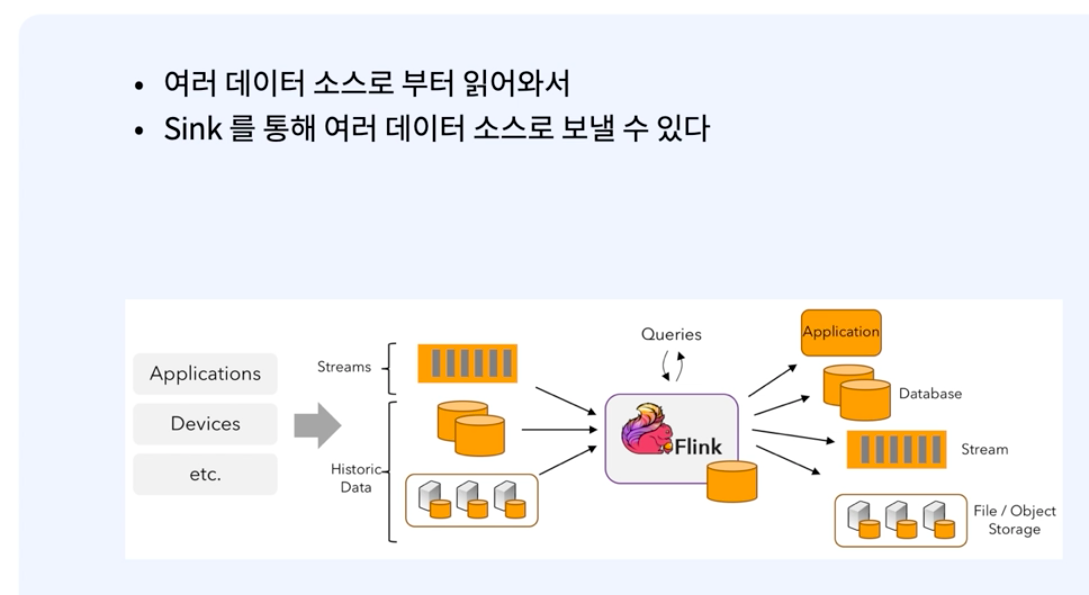

## Hadoop vs Spark vs Flink
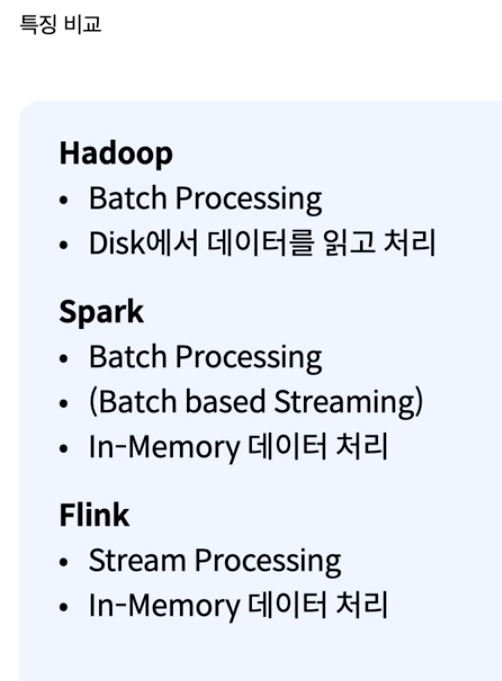
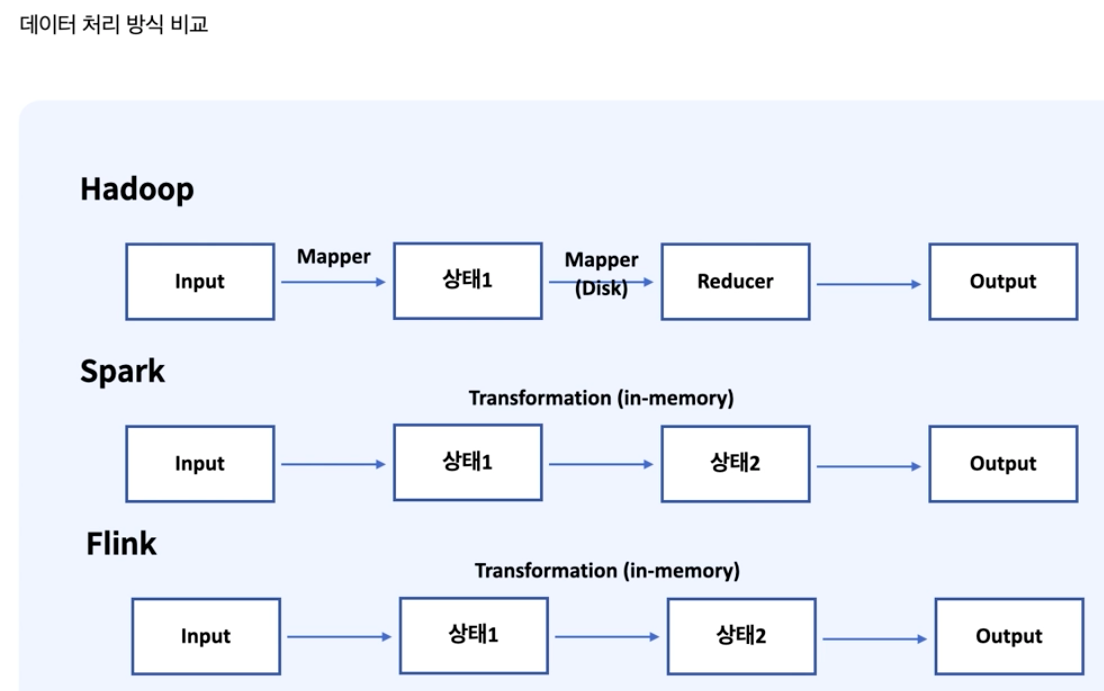
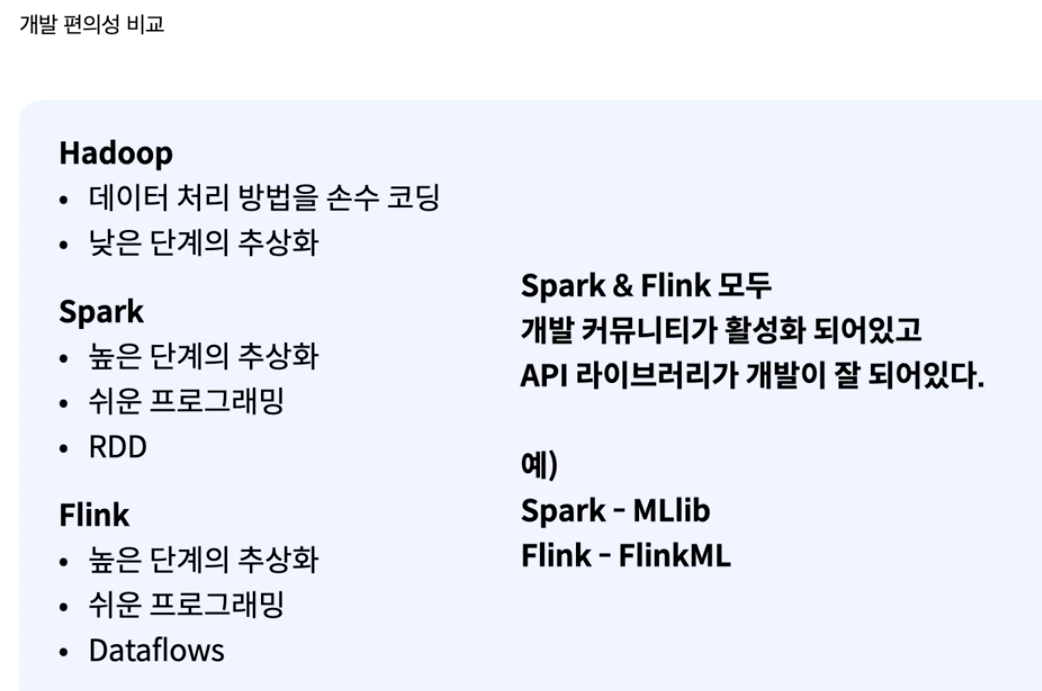
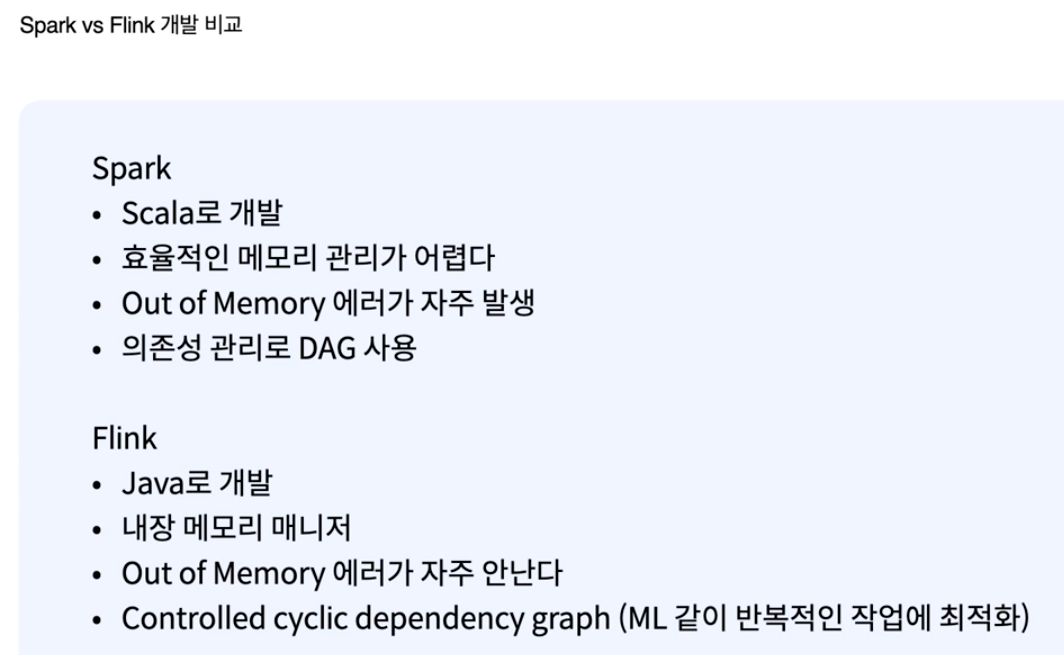

## Flink
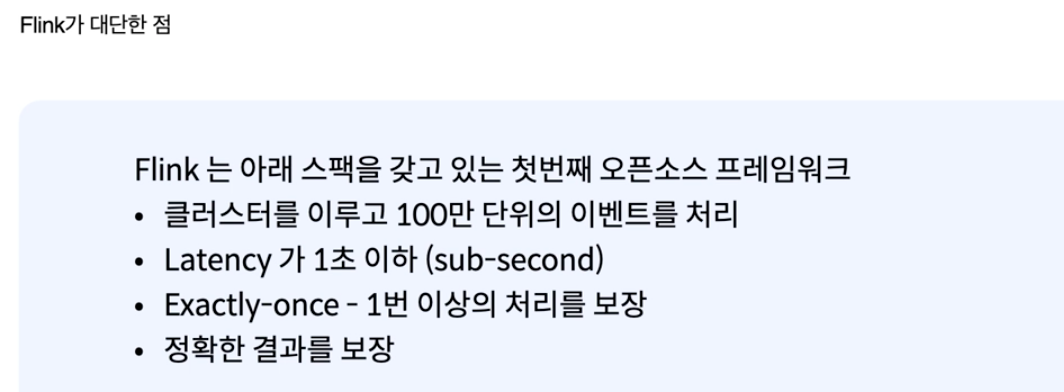
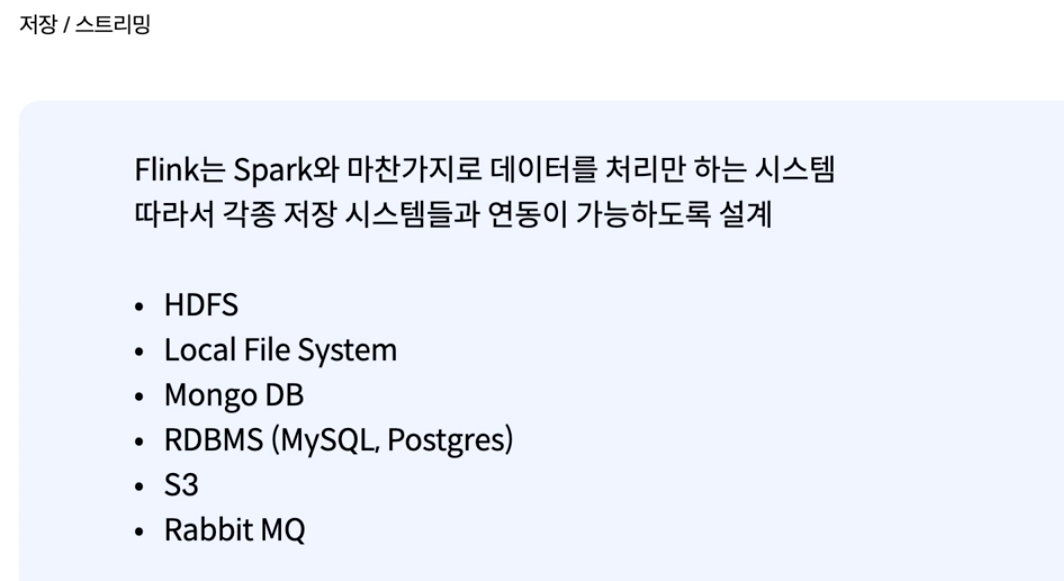
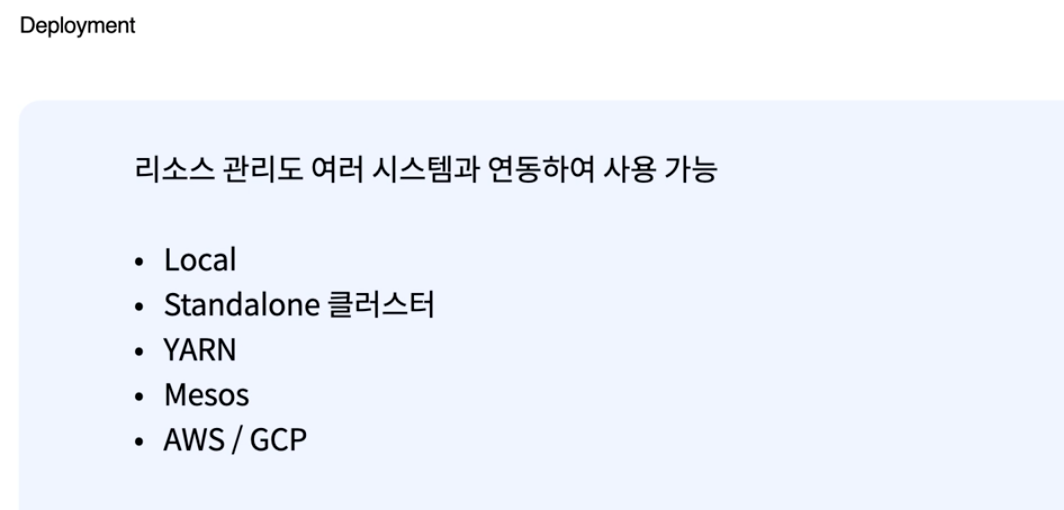
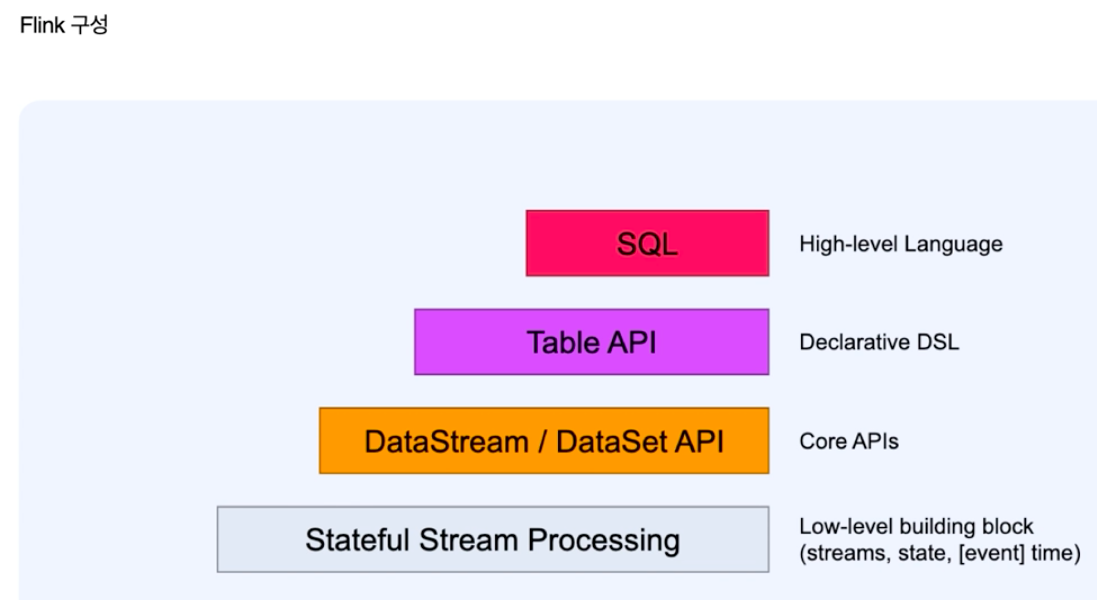
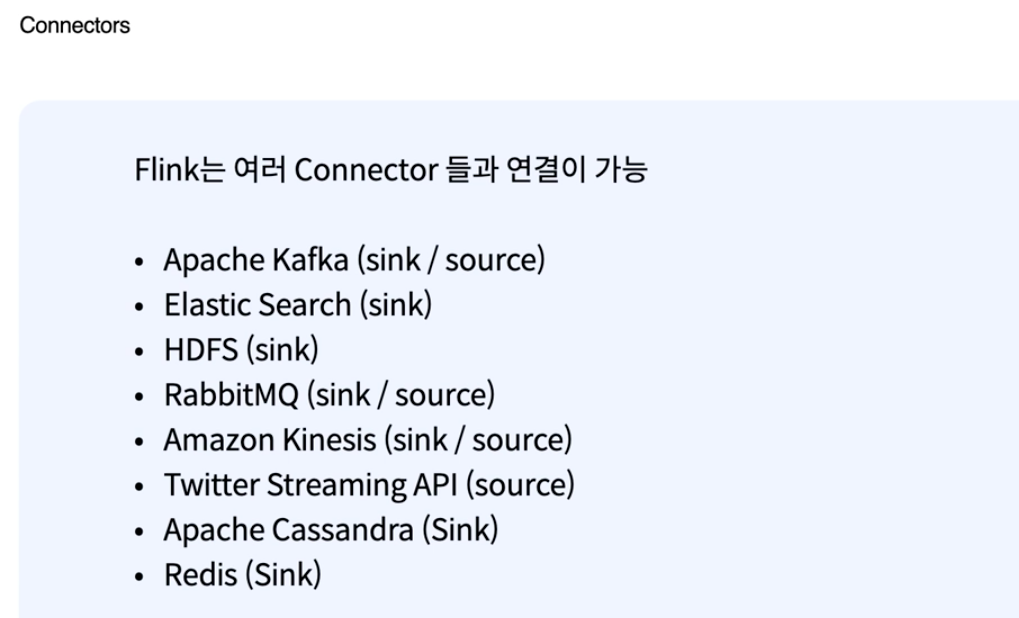
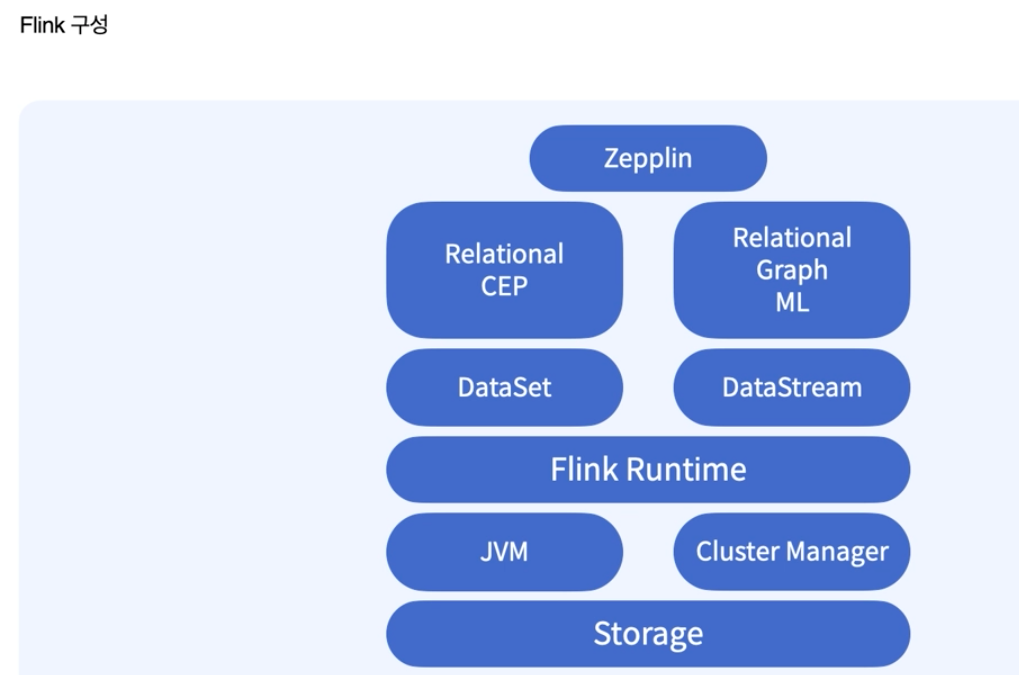

# 설치
아래 링크에서 최신 버전을 설치 가능  
https://flink.apache.org/downloads.html#apache-flink-1143
  
pyflink를 사용하기 위해 아래 명령어로 설치  
!pip install apache-flink

----------
설치 하려고 했더니 시간도 오래 걸리다가 다음과 같은 에러가 뜨면서 설치에 실패한다.
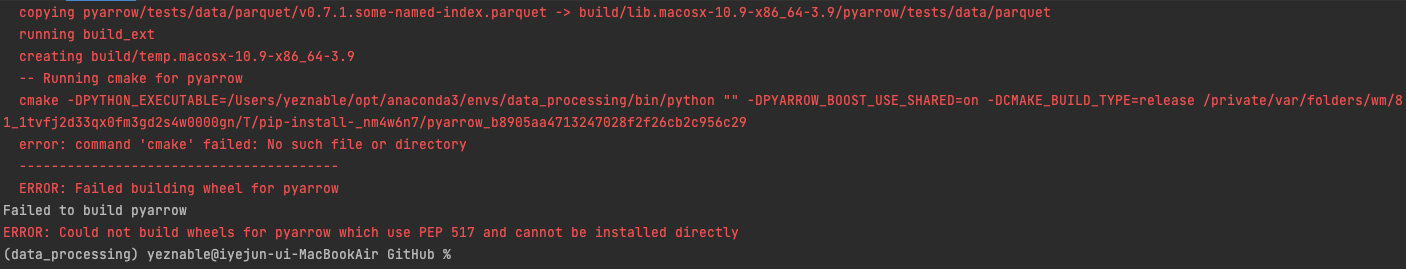  
  
검색해보니 버전 문제라는 얘기가 많았고 일단은 아래 명령어로 wheel부터 업그레이드 해서 시도해봤지만 똑같은 결과였다.    
!pip install --upgrade pip setuptools wheel  
  
그래서 다음으로 에러를 일으키는 pyarrow를 따로 먼저 설치하고 시도하라는 대로 해봤는데 다음처럼 pyarrow는 잘 설치 되고는 똑같은 에러가 나온다.  
!pip install pyarrow  
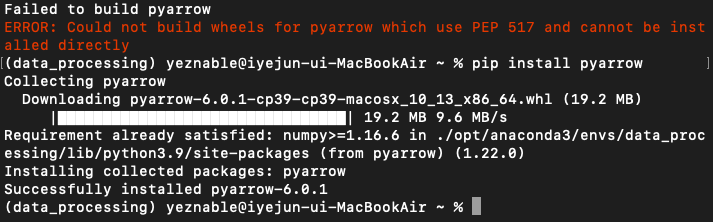  

조금 더 위쪽에 나타났던 cmake가 동작하지 않는다는 에러를 확인해보니 MacOS의 Big Sur 버전에서 생긴 이슈라고 한다.  
https://brewinstall.org/install-cmake-on-mac-with-brew/ 링크에서 brew를 통해 Big Sur에서도 cmake를 쓸 수 있도록 설치하는 방법을 안내했다.  
근데 그냥 brew install이 아니라 앞에 경로를 넣어주는게 있어서 일단 그냥 brew 설치하면 될 지 궁금해서 해봤다.  
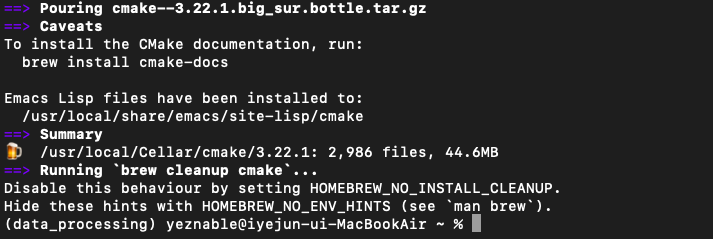  
위와 같은 문구가 나왔고 apache-flink는 여전히 설치에 실패해서 시키는 대로 해봤는데도 다음과 같이 뭐가 안돼서 다른 방법을 찾아야 했다.  
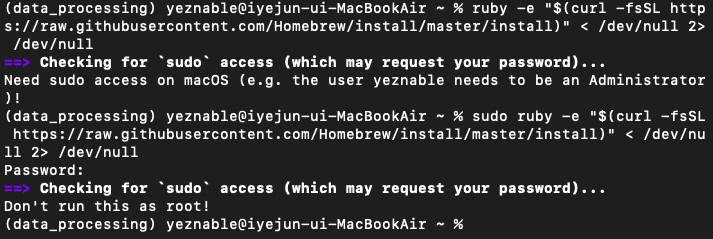
  
어떤 글에서는 cmake를 pip으로서 설치하고 시도해보라고 해서 했는데도 안됐다.  

---------
  
결국 아래 공식 문서에 나온 "python -m pip install apache-flink==1.9.2" 명령으로 설치했다.  
https://nightlies.apache.org/flink/flink-docs-release-1.9/tutorials/python_table_api.html  
  
예제 파일을 실행했을 때 아래와 같은 create attribute가 존재하지 않는다는 불안한 에러가 뜨지만 설치가 안되는 것보다는 에러를 잡는게 낫다...  
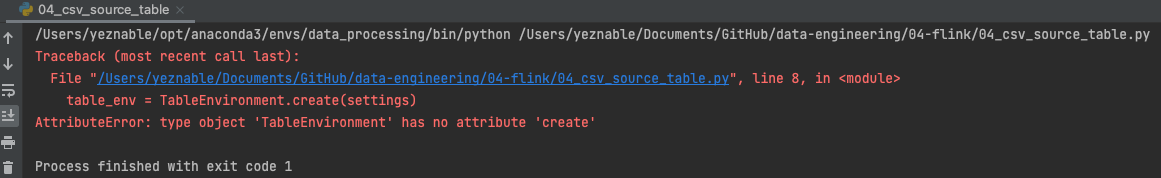

-------------
# Source

외부의 데이터를 flink로 가져오는 것을 Source Table을 만든다고 표현할 수 있다.  
Flink를 활용할 때 가장 핵심적인 요소중 하나인 Source를 만드는 여러 방법이 있다.  
여러 방법을 통해 Source를 생성하는 방법이 01~06파일에 정의되어있다.  
개인적으로 Source를 생성하고 활용하기에 중요한 방법은 kafka와 연동하여 활용하는 방법이라고 생각하여 이 노트북에서는 해당 방법을 정리한다.

----------
kafka와 flink를 함께 연동하여 사용하는 과정을 실습하기 위해 이전과 같게 하지만 브로커를 여러개 생성할 필요는 없어서 다음과 같이 docker-compose.yml파일을 작성하고 도커를 실행한다.

In [ ]:
version: '3'
services:
  zookeeper:
    image: zookeeper:3.7
    hostname: zookeeper
    ports:
      - "2181:2181"
    environment:
      ZOO_MY_ID: 1
      ZOO_PORT: 2181
    volumes:
      - ./data/zookeeper/data:/data
      - ./data/zookeeper/datalog:/datalogco
  kafka:
    image: confluentinc/cp-kafka:7.0.0
    hostname: kafka
    ports:
      - "9092:9092"
    environment:
      KAFKA_ADVERTISED_LISTENERS: LISTENER_DOCKER_INTERNAL://kafka:19092,LISTENER_DOCKER_EXTERNAL://${DOCKER_HOST_IP:-127.0.0.1}:9092
      KAFKA_LISTENER_SECURITY_PROTOCOL_MAP: LISTENER_DOCKER_INTERNAL:PLAINTEXT,LISTENER_DOCKER_EXTERNAL:PLAINTEXT
      KAFKA_INTER_BROKER_LISTENER_NAME: LISTENER_DOCKER_INTERNAL
      KAFKA_ZOOKEEPER_CONNECT: "zookeeper:2181"
      KAFKA_BROKER_ID: 1
      KAFKA_OFFSETS_TOPIC_REPLICATION_FACTOR: 1
    volumes:
      - ./data/kafka/data:/tmp/kafka-logs
    depends_on:
      - zookeeper
  kafdrop:
    image: obsidiandynamics/kafdrop
    restart: "no"
    ports: 
      - "9000:9000"
    environment:
      KAFKA_BROKER_CONNECT: "kafka:19092"
    depends_on:
      - kafka

위와 같이 정의한 docker-compose.yml을 docker-compose up 명령어로 생성하고  
flink와 kafka를 활용한 Source 생성을 하려는데 우선은 아래 링크로 들어가서 커넥터를 다운로드 받고 Flink 폴더 아래에 옮겨줘야한다.  
https://nightlies.apache.org/flink/flink-docs-release-1.14/docs/connectors/table/kafka/  
  
이후 kafka와 flink를 연결하여 Source를 만드는 파일을 실행시키려는데 pyflink 설치에는 성공했지만 그 내부의 몇 파트가 다음과 같이 빨간 줄로 나타난다.
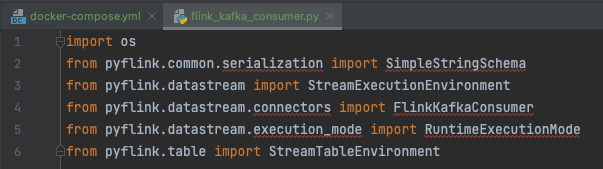  
  
혹시 flink가 업데이트 되면서 추가된 파트인가 싶어 "pip install --upgrade apache-flink"로 업그레이드 해보았지만 이전과 같이 pyarrow의 설치 중에 cmake를 활용한 빌드에 실패하면서 업그레이드 되지 않았다.  
  
---------------
  
앞선 검색 중에 cmake가 Big Sur에서 제대로 동작하지 않는다고 나왔던 것과 함께 pyflink가 python3.8에서 잘 설치되지 않는다는 결과를 몇번 봤다.  
python 버전이 문제가있는 것일 수도 있겠다는 희망을 가지고 새로운 conda env를 python3.7 버전으로 생성하고 이전과 똑같이 "pip install apache-flink"로 설치했더니 문제없이 설치가 되었다.  
  
해당 conda env에서 flink_kafka_consumer.py를 실행시키니 다음과 같이 kafdrop에서 flink-test 토픽이 생성된 것을 확인할 수 있었다.
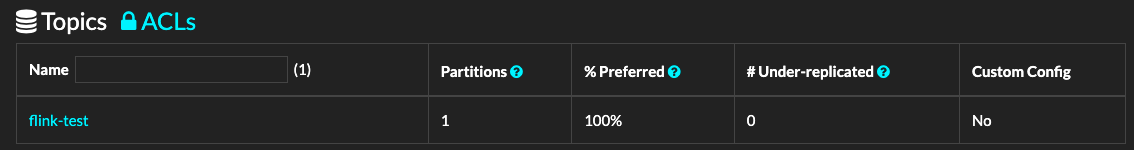  
  
더 간단한 방식으로 kafka consumer를 만드는 예제는 flink_kafka_consumer_sql.py 파일을 참조하면 된다.  
차이점은 flink_kafka_consumer.py에서 flink-test 토픽을 자동으로 생성해주었던 것처럼 flink_kafka_consumer_sql.py에서는 자동으로 토픽을 생성해주지 않고 없는 토픽에 대한 코드는 에러를 뱉는다.

--------

# Sink

 Source Table을 만드는 것이 외부 데이터를 flink로 가져오는 행동이었다면 flink의 데이터를 외부로 내보내는 것이 Sink이다.  
 Spark의 reduce와 비슷하다고 생각해볼 수 있다.  
   
 외부 데이터를 csv에서 읽어오는 04_csv_source_table.py에서 읽어온 데이터를 sink시켜 새로운 csv파일로 내보내는 예제가 08_csv_sink_table.py이다.

--------
단순히 filesystem으로 데이터를 옮기는 것이 아닌 kafka로 sink시키는 방법으로는 위에서 Source table을 만들었을때와 같이 datastream으로 sink시키는 방법과 sql을 활용할 수 있는 table로 sink시키는 방법이 있다.  
  
두 방법 모두 09_kafka_sink 디렉토리에 들어있다.  
강의에서는 이전과 똑같은 도커 환경을 새로 실행시켰는데 설정이 달라진게 없어서 이미 실행시켜둔 도커로도 되는지 궁금해서 해봤다.  
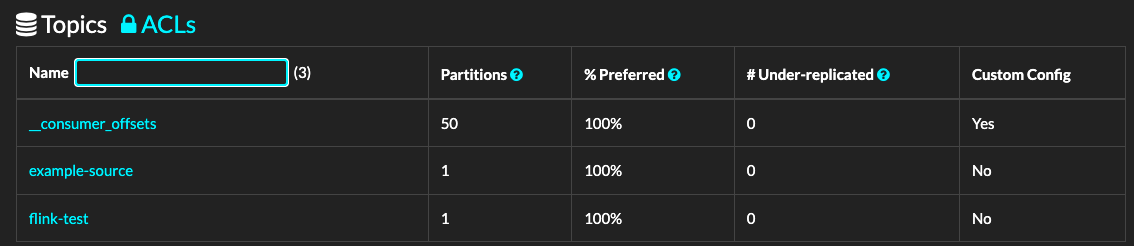  
flink_kafka_to_kafka.py를 실행시켰을 때 example-source 토픽이 생성된 것을 확인했다.  
이후 producer.py를 실행시켜서 메시지가 전달되는 것을 확인하려는데 flink 설치를 위해 새로 만든 conda env여서 kafka-python을 다시 설치해야 했다.  
producer.py를 실행시키니 다음과 같이 example-destination 토픽이 생성된 것을 확인할 수 있고
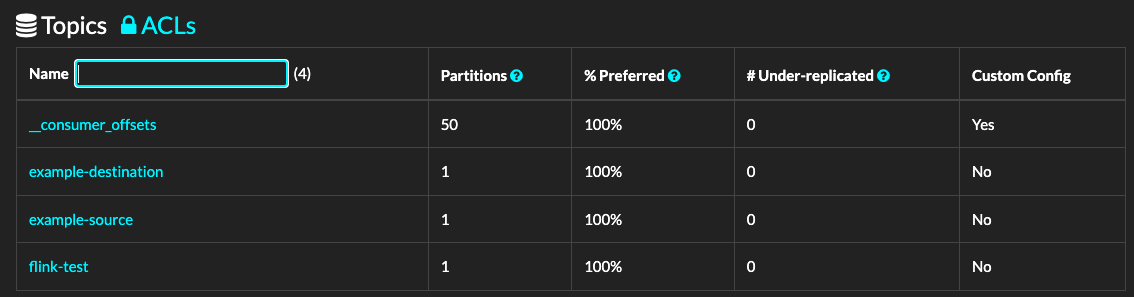  
다음과 같이 실제 메시지가 전달 된 것을 확인할 수 있다.
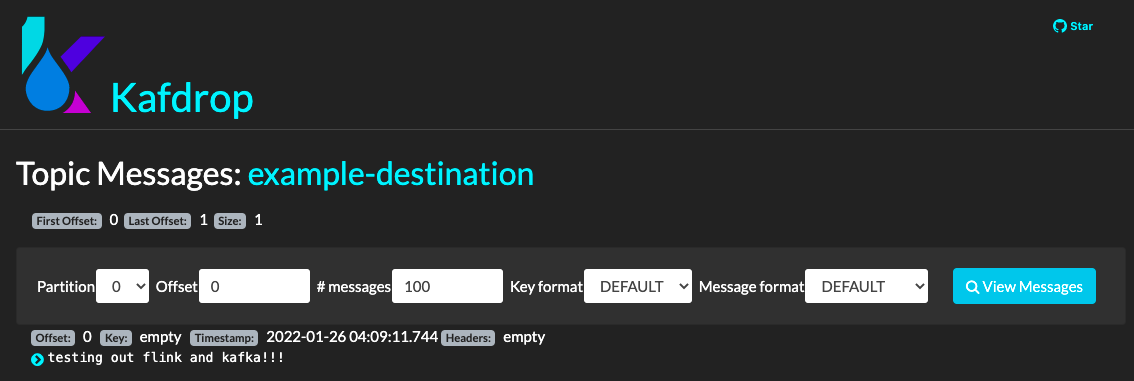  

--------

flink_kafka_to_kafka_sql.py을 실행시켜둔 채로 json_producer.py를 실행시키니 다음과 같이 table 방식으로 sql을 활용하여 sink시키는 것을 확인했다.
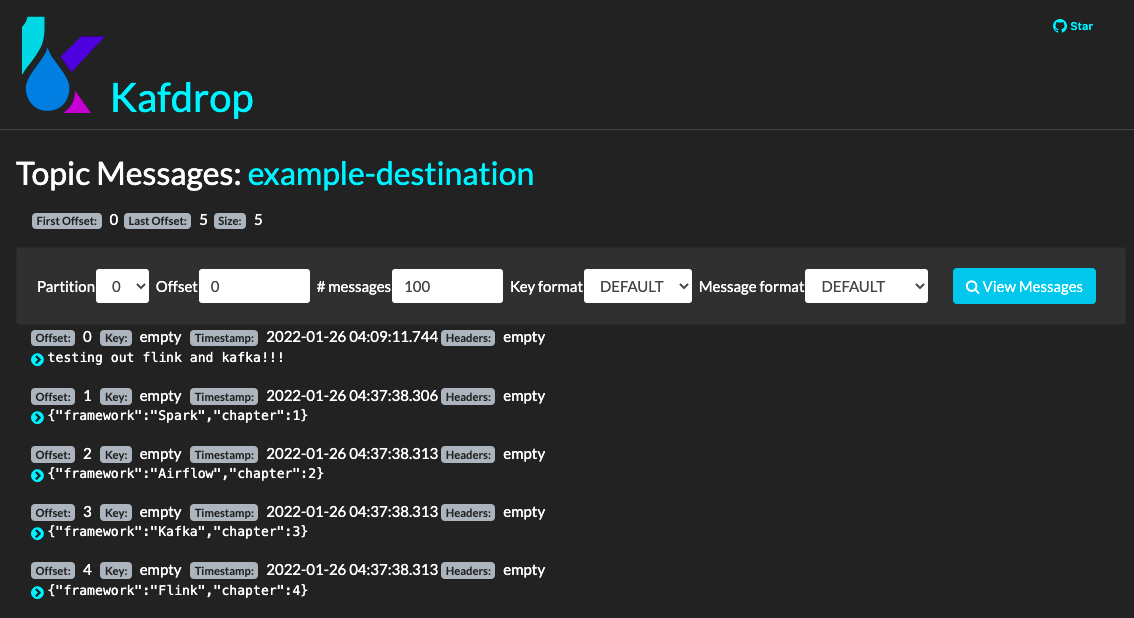

--------

# Explain

Spark에서 최적화 과정을 확인해볼 수 있었듯이 flink에서도 최적화 과정을 확인할 수 있다.  
이에 대한 예제로 10_explain.py를 실행시키면 확인할 수 있다.

-----------

지금껏 정리한 기본 요소들을 다양하게 활용하는 예제로 11_multi_sink.py와 12_convert.py를 확인해볼 수 있다.  

--------

# 끝이 있는 테이블과 다이나믹 테이블 활용

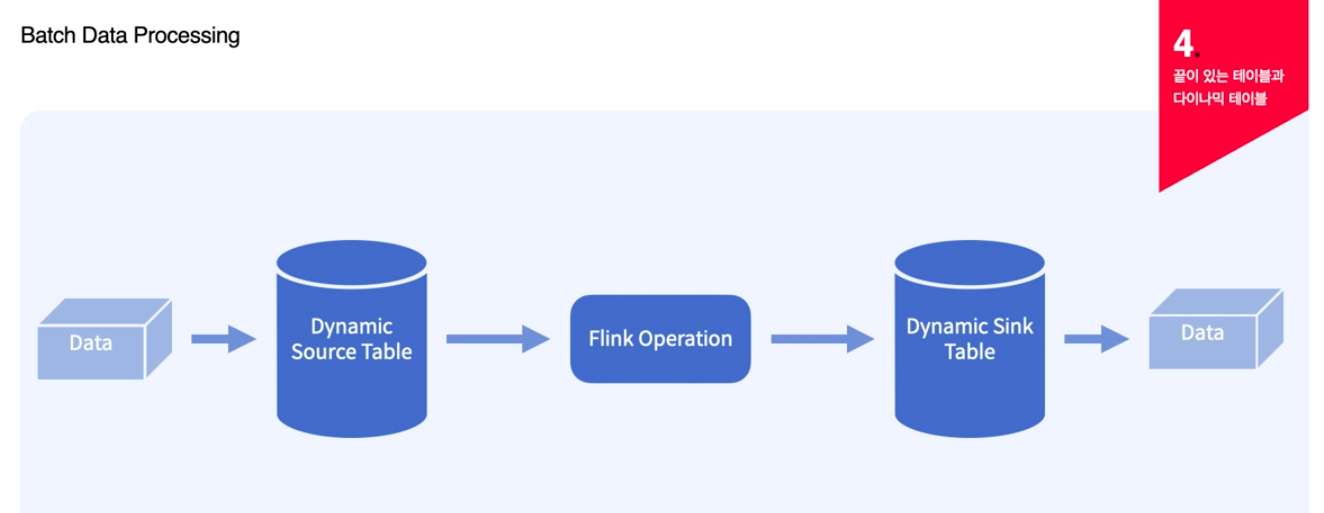
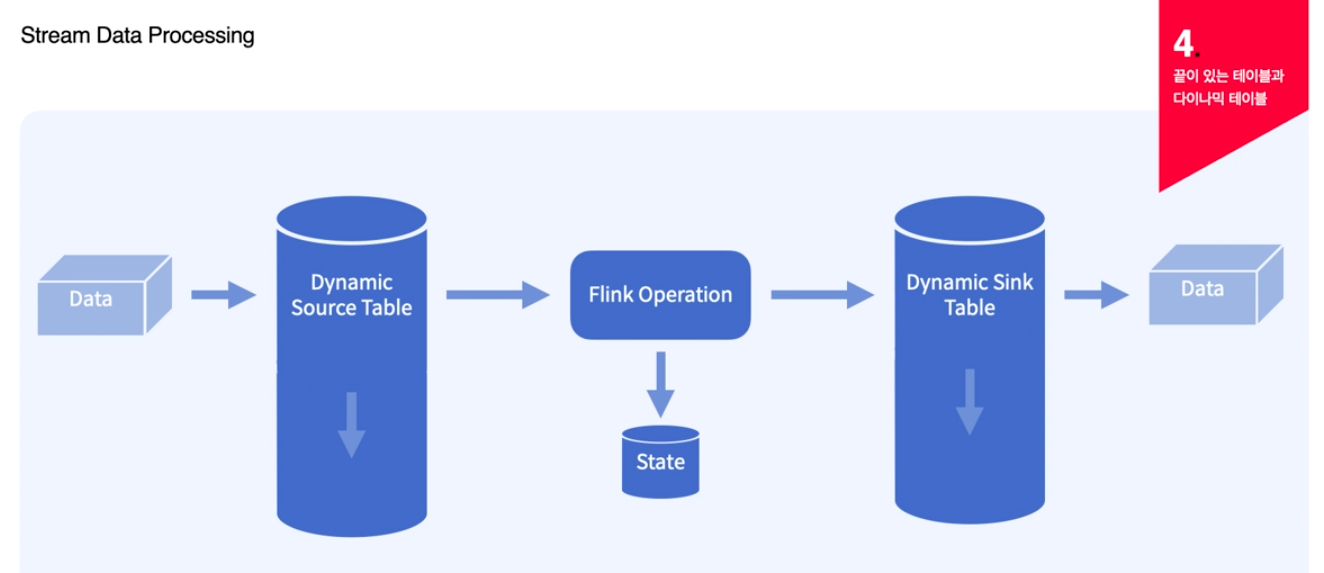
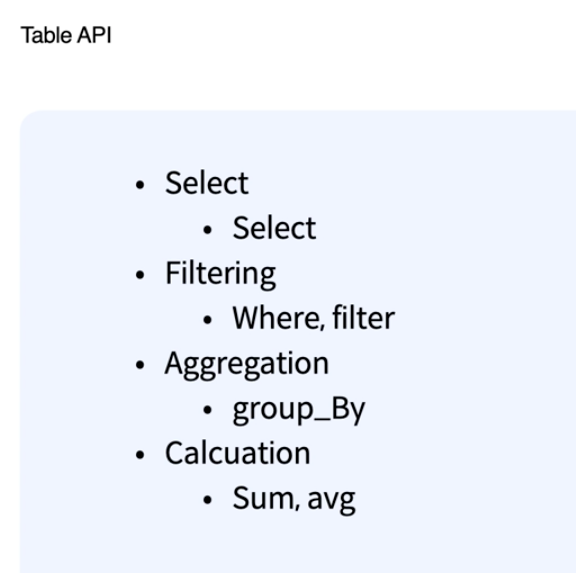
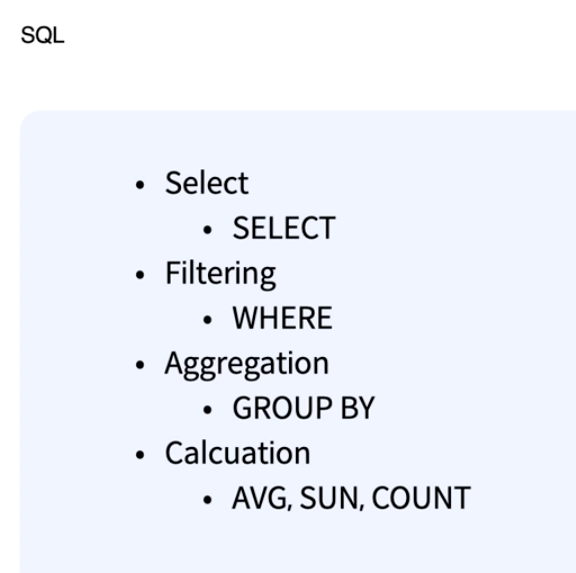

---------

위의 테이블과 SQL을 활용하는 예제는 13~16번 예제 파일로 확인할 수 있다.

--------------

# Window Operation

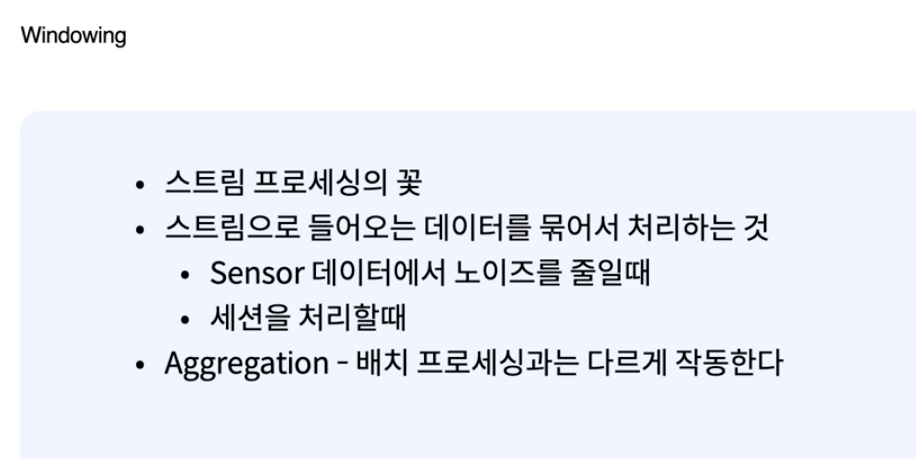
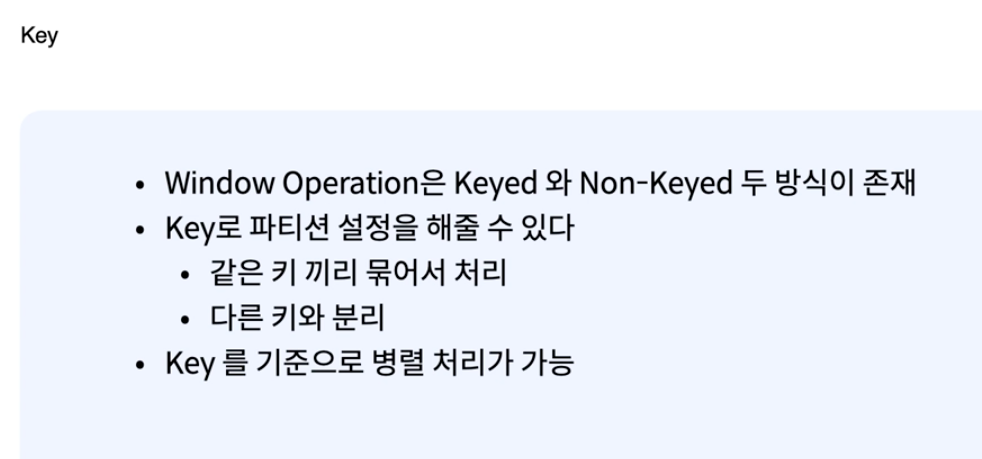
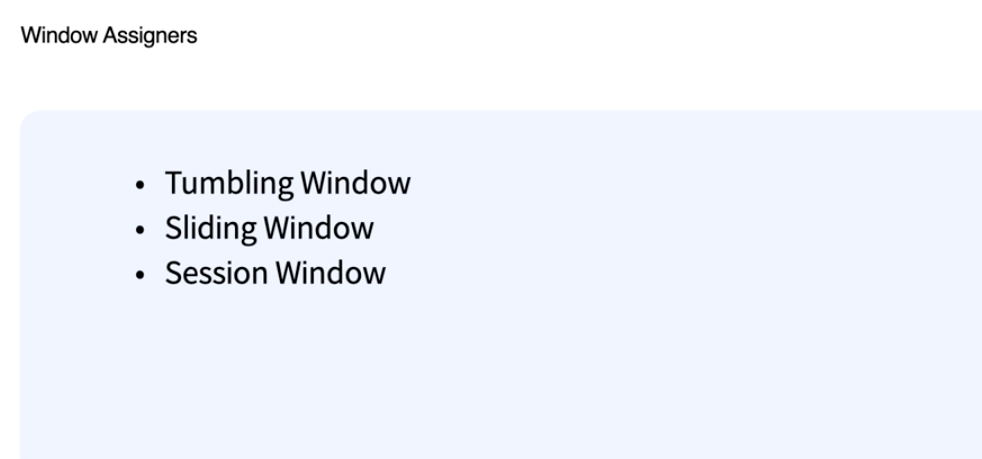
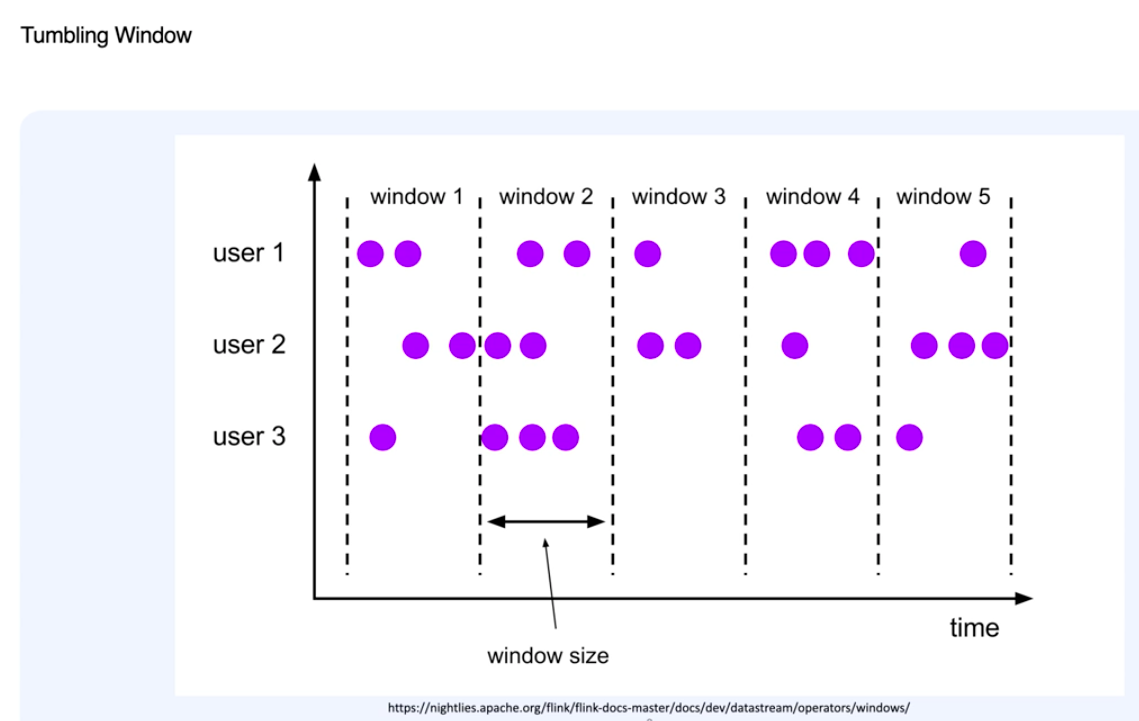
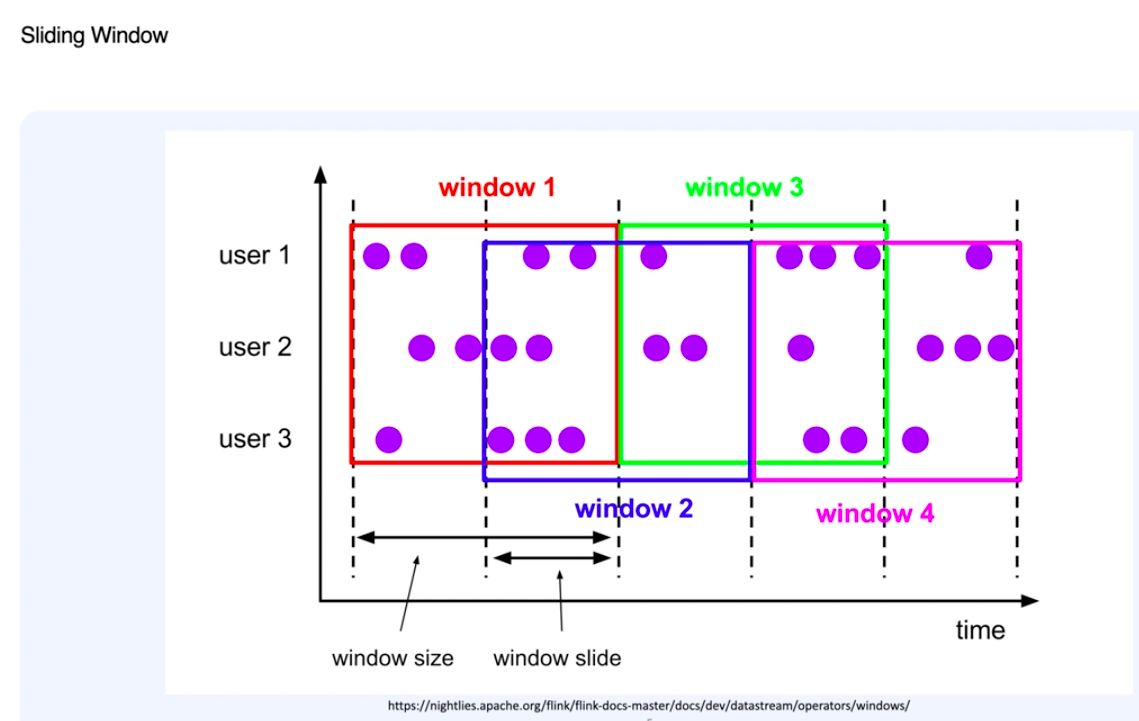
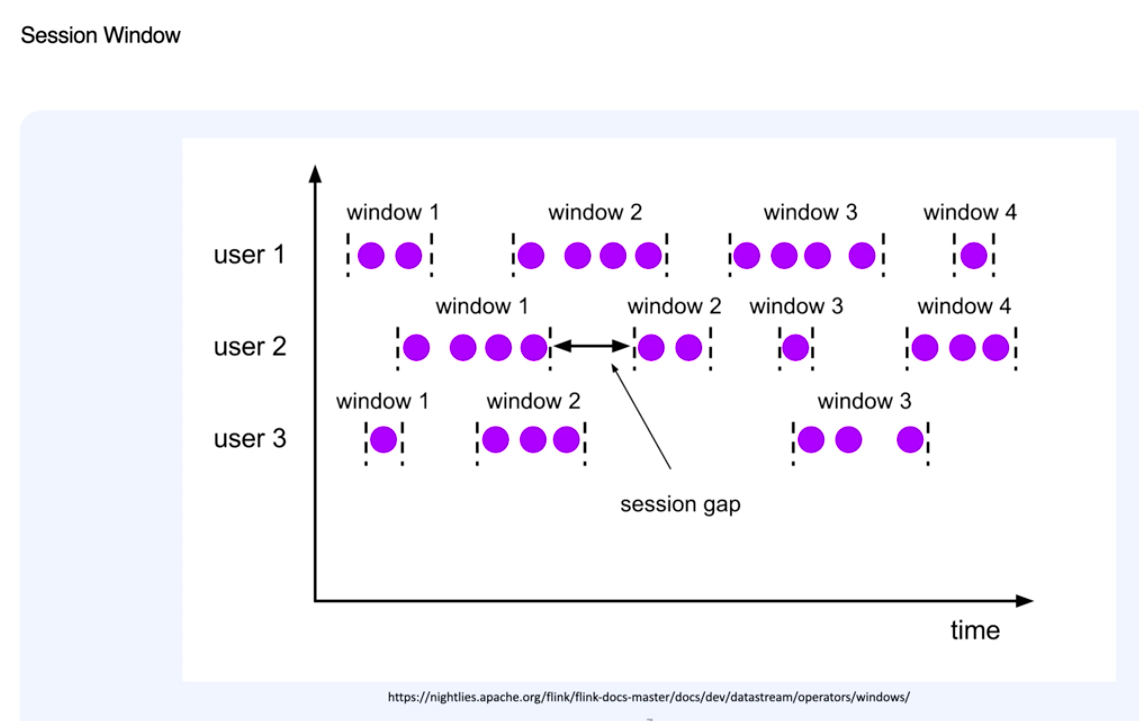
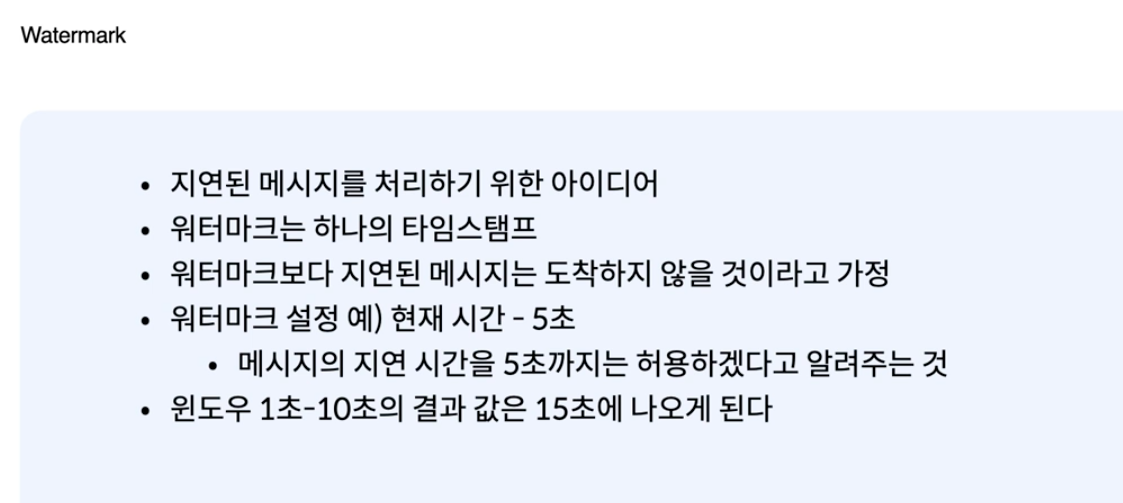

위의 내용들을 확인하는 예제 파일은 17~24번 파일에서 확인할 수 있다.